<a href="https://colab.research.google.com/github/andreaeddyricci/Webinar-Attendance-Capstone/blob/main/Preprocessing_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and the Data

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [59]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import eli5

In [61]:
from google.colab import drive

In [62]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
path = '/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/dataset_to_model.csv'
df = pd.read_csv(path, index_col='Unnamed: 0')

In [64]:
df.columns

Index(['City', 'State/Province', 'Industry', 'Questions & Comments',
       'Country/Region Name', 'Source Name', 'webinar_name',
       'Job Title Category', 'Number_of_Logins', 'Registered_Webinars',
       'Attended_Webinars', 'Attended_Percent', 'Time_in_session_percent',
       'night_time'],
      dtype='object')

In [65]:
df.head()

,City,State/Province,Industry,Questions & Comments,Country/Region Name,Source Name,webinar_name,Job Title Category,Number_of_Logins,Registered_Webinars,Attended_Webinars,Attended_Percent,Time_in_session_percent,night_time
0,Pune,Other,Software - Other,0,India,mailchimp,3D Metal,Other,0.0,3,1,0.333333,0.0,0
1,Pune,Other,Other,0,India,mailchimp,Biomaterials,Other,0.0,3,1,0.333333,0.0,0
2,bazpur,Other,Education,0,India,mailchimp,Indian Ecosystem,None,5.0,3,1,0.333333,1.0,0
3,Kayseri,Other,High Tech - Other,0,Turkey,linkedin,Biomaterials,Academic,0.0,1,0,0.000000,0.0,0
4,Nairobi,Other,High Tech - Other,0,Kenya,website,Preprocessing,C-Suite,0.0,1,0,0.000000,0.0,0


#Removing Features

In [66]:
df.dtypes

City                        object
State/Province              object
Industry                    object
Questions & Comments         int64
Country/Region Name         object
Source Name                 object
webinar_name                object
Job Title Category          object
Number_of_Logins           float64
Registered_Webinars          int64
Attended_Webinars            int64
Attended_Percent           float64
Time_in_session_percent    float64
night_time                   int64
dtype: object

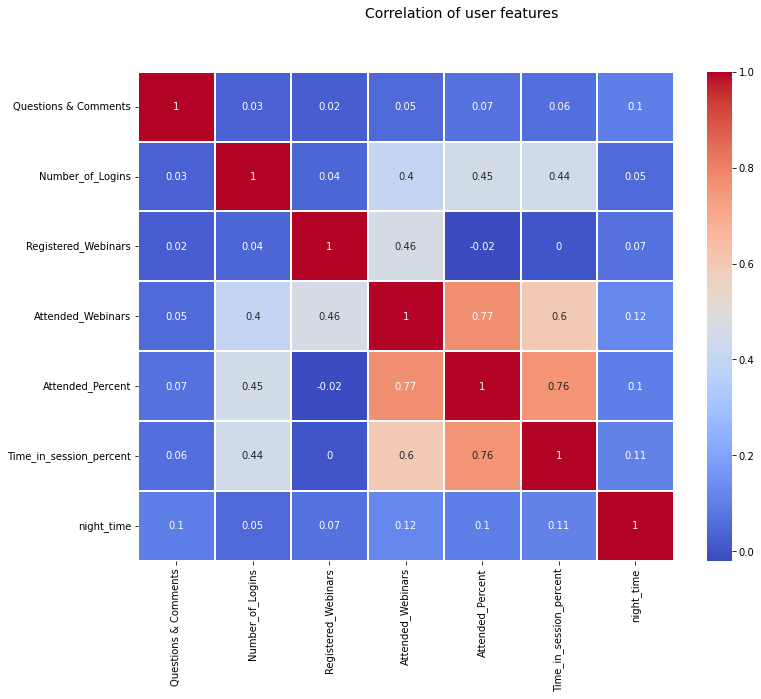

In [67]:
# Check all correlations:
corr_map = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corr_map,2), annot=True, cmap="coolwarm",
                 linewidths=.05)
t= fig.suptitle('Correlation of user features', fontsize=14)

#One Hot Encoding

In [68]:
#Create dummy or indicator features for categorical variables
dummy_df = pd.get_dummies(df[['City', 'State/Province','Industry', 
                              'Country/Region Name', 'Source Name', 
                              'webinar_name', 'Job Title Category']], drop_first = True)
df_combined = pd.concat([df, dummy_df], axis=1) #combine the dfs
df_combined.drop(['City', 'State/Province', 
          'Industry', 'Country/Region Name', 'Source Name',
          'webinar_name', 'Job Title Category'], axis=1, inplace=True) #remove the original columns

# Cross Validating and Training

inspiration: https://www.kaggle.com/code/junkal/selecting-the-best-regression-model#Picking-out-the-relevant-attributes-for-regression-modelling

Our goal is to predict what percent of a webinar a person will attend.

In [69]:
cols = df_combined.columns

In [70]:
# The target variable (y) is time spent in a session (percent)
# All other columns are the features (X)
X = df_combined[cols].drop('Time_in_session_percent',axis=1)
y = df_combined['Time_in_session_percent']

In [71]:
# Spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [72]:
#scaler = StandardScaler()
#y_train = scaler.fit_transform(y_train.values.reshape(1, -1))

In [73]:
# checking common regression models
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledTREE', Pipeline([('Scaler', StandardScaler()),('TREE', DecisionTreeRegressor())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))
pipelines.append(('ScaledSGD', Pipeline([('Scaler', StandardScaler()),('SGD', SGDRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledBR', Pipeline([('Scaler', StandardScaler()),('BR', BayesianRidge())])))
pipelines.append(('ScaledKR', Pipeline([('Scaler', StandardScaler()),('KR', KernelRidge())])))
pipelines.append(('ScaledXGBOOST', Pipeline([('Scaler', StandardScaler()),('XGBoost', XGBRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -1976053143654308356051435520.000000 (550227429127028657918836736.000000)
ScaledLASSO: -0.154343 (0.009782)
ScaledEN: -0.154343 (0.009782)
ScaledKNN: -0.132609 (0.009401)
ScaledTREE: -0.085528 (0.014807)
ScaledGB: -0.047572 (0.008485)
ScaledSGD: -0.098176 (0.007667)
ScaledSVR: -0.089689 (0.009072)
ScaledBR: -0.086148 (0.005956)
ScaledKR: -0.214631 (0.034284)
ScaledXGBOOST: -0.051702 (0.008274)


In [74]:
# Root Mean Squared Error
rmse=[]
for i in results:
  rmse.append(np.sqrt(-np.mean(i)))

In [75]:
rmse_df = pd.DataFrame(data = [names, rmse]).T
rmse_df = rmse_df.rename(columns={0:'model_name', 1:'RMSE'})
rmse_df.sort_values('RMSE')

,model_name,RMSE
5,ScaledGB,0.218111
10,ScaledXGBOOST,0.22738
4,ScaledTREE,0.292451
8,ScaledBR,0.293509
7,ScaledSVR,0.299481
6,ScaledSGD,0.31333
3,ScaledKNN,0.364155
1,ScaledLASSO,0.392866
2,ScaledEN,0.392866
9,ScaledKR,0.463283


We will dive deeper into the top 6 models and see which has the greatest predictive power (lowest root mean squared error).

I will be training and testing Gradient Boosting (GB), BayesianRidge (BR) and Stochastic Gradient Descent (SGD).

#Scoring Function

more info about scoring for regression: https://scikit-learn.org/stable/modules/model_evaluation.html

https://theprofessionalspoint.blogspot.com/2019/02/loss-functions-in-machine-learning-mae.html

In [76]:
def find_scores(y_test, y_pred):
  meanAbsoluteError = mean_absolute_error(y_test, y_pred)
  meanSquaredError = mean_squared_error(y_test, y_pred)
  return np.sqrt(meanSquaredError) #rootMeanSquaredError

def print_scores(y_test, y_pred):
  meanAbsoluteError = mean_absolute_error(y_test, y_pred)
  meanSquaredError = mean_squared_error(y_test, y_pred)
  rootMeanSquaredError = np.sqrt(meanSquaredError)

  print('Mean Absolute Error:', meanAbsoluteError)  
  print('Mean Squared Error:', meanSquaredError)  
  print('Root Mean Squared Error:', rootMeanSquaredError)

#Scaling

In [77]:
#Scale the features that are not between 0 and 1
scaler = StandardScaler()
X_train[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']] = scaler.fit_transform(X_train[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']].values)
X_test[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']] = scaler.fit_transform(X_test[['Number_of_Logins', 'Registered_Webinars','Attended_Webinars']].values)


#Gradient Boosting

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [78]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)

GB_RMSE = find_scores(y_test, y_pred_GB)

print_scores(y_test, y_pred_GB)

Mean Absolute Error: 0.15265269491706288
Mean Squared Error: 0.06238799470681299
Root Mean Squared Error: 0.24977588896211136


In [79]:
#What features are important?
eli5.show_weights(GB, top=10, feature_names = X_train.columns.tolist())

Weight,Feature
0.8470 ± 0.6828,Number_of_Logins
0.0191 ± 0.1106,City_Mumbai
0.0080 ± 0.0988,Country/Region Name_United Arab Emirates
0.0071 ± 0.0354,Country/Region Name_Turkey
0.0052 ± 0.1585,City_CABA
0.0050 ± 0.1577,City_Kétsoprony
0.0049 ± 0.1574,City_Nijmegen
0.0047 ± 0.1551,City_Ksa
0.0047 ± 0.1565,City_Idukki
0.0042 ± 0.1607,City_huercal de almeria


##Hyperparameter Tuning

In [80]:
param_grid_GB = {
    "n_estimators": [5, 50, 500, 1000],
    "max_depth": [5, 10, 25],
    "min_samples_split": [1, 5, 10],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

GB_grid = RandomizedSearchCV(GradientBoostingRegressor(), param_grid_GB, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
GB_grid.fit(X_train, y_train)
print(GB_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_v

{'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 5, 'learning_rate': 0.01}


Now, I will rerun with the best parameters.

In [81]:
GB_tuned = GradientBoostingRegressor(**GB_grid.best_params_)
GB_tuned.fit(X_train, y_train)

y_pred_GB_tuned = GB_tuned.predict(X_test)

GB_tuned_RMSE = find_scores(y_test, y_pred_GB_tuned)

print_scores(y_test, y_pred_GB_tuned)

Mean Absolute Error: 0.14916010508848754
Mean Squared Error: 0.05999426119732667
Root Mean Squared Error: 0.2449372597162928


In [82]:
#What features are important?
eli5.show_weights(GB_tuned, top=10, feature_names = X_train.columns.tolist())

Weight,Feature
0.8479 ± 0.6974,Number_of_Logins
0.0195 ± 0.0647,City_Mumbai
0.0088 ± 0.0563,Country/Region Name_Turkey
0.0084 ± 0.0738,Country/Region Name_United Arab Emirates
0.0051 ± 0.1052,City_CABA
0.0051 ± 0.1033,City_Kétsoprony
0.0045 ± 0.1059,City_Ksa
0.0043 ± 0.1040,City_Idukki
0.0042 ± 0.0597,City_NYC
0.0041 ± 0.1046,City_huercal de almeria


#Bayesian Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html

In [83]:
BR = BayesianRidge()
BR.fit(X_train, y_train)
y_pred_BR = BR.predict(X_test)

BR_RMSE = find_scores(y_test, y_pred_BR)

print_scores(y_test, y_pred_BR)

Mean Absolute Error: 0.1912589558515609
Mean Squared Error: 0.07214256934231147
Root Mean Squared Error: 0.26859368820266694


##Hyperparameter Tuning

In [84]:
param_grid_BR = {
    'n_iter': [5, 50, 500, 1000],
    'alpha_init':[1, 1.2, 1.5, 1.9],
    'lambda_init': [1e-1, 1e-3, 1e-5, 1e-9]
}

BR_grid = RandomizedSearchCV(BayesianRidge(), param_grid_BR, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
BR_grid.fit(X_train, y_train)
print(BR_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_iter': 1000, 'lambda_init': 0.1, 'alpha_init': 1}


Now, I will rerun with the best parameters.

In [85]:
BR_tuned = BayesianRidge(**BR_grid.best_params_)
BR_tuned.fit(X_train, y_train)

y_pred_BR_tuned = BR_tuned.predict(X_test)

BR_tuned_RMSE = find_scores(y_test, y_pred_BR_tuned)

print_scores(y_test, y_pred_BR_tuned)

Mean Absolute Error: 0.19125898260470578
Mean Squared Error: 0.0721425959091705
Root Mean Squared Error: 0.26859373765814143


#Stochastic Gradient Descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [86]:
SGD = SGDRegressor()
SGD.fit(X_train, y_train)
y_pred_SGD = SGD.predict(X_test)

SGD_RMSE = find_scores(y_test, y_pred_SGD)

print_scores(y_test, y_pred_SGD)

Mean Absolute Error: 0.1942776993216637
Mean Squared Error: 0.06992656610622594
Root Mean Squared Error: 0.26443631767634707


In [87]:
#What features are important?
eli5.show_weights(SGD, top=20, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.264,Attended_Percent
+0.155,Attended_Webinars
+0.092,<BIAS>
+0.055,Source Name_website
+0.047,Number_of_Logins
+0.043,webinar_name_Preprocessing
+0.042,"Industry_Medical, Pharma, Biotech"
+0.039,Country/Region Name_Germany
+0.032,Industry_Manufacturing
+0.031,Industry_Other


##Hyperparameter Tuning

In [88]:
param_grid_SGD = {
    'max_iter': [5, 500, 5000, 10000],
    'alpha':[1e-06, 1e-04, 1e-02, 1],
    'epsilon': [1e-06, 1e-04, 1e-02, 1]
}

SGD_grid = RandomizedSearchCV(SGDRegressor(), param_grid_SGD, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
SGD_grid.fit(X_train, y_train)
print(SGD_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_iter': 10000, 'epsilon': 1e-06, 'alpha': 0.0001}


Now, I will rerun with the best parameters.

In [89]:
SGD_tuned = SGDRegressor(**SGD_grid.best_params_)
SGD_tuned.fit(X_train, y_train)

y_pred_SGD_tuned = SGD_tuned.predict(X_test)

SGD_tuned_RMSE = find_scores(y_test, y_pred_SGD_tuned)

print_scores(y_test, y_pred_SGD_tuned)

Mean Absolute Error: 0.19499830801248663
Mean Squared Error: 0.06980076871361704
Root Mean Squared Error: 0.2641983510804279


In [90]:
#What features are important?
eli5.show_weights(SGD_tuned, top=10, feature_names = X_train.columns.tolist())

#Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [91]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_RMSE = find_scores(y_test, y_pred_lasso)

print_scores(y_test, y_pred_lasso)


Mean Absolute Error: 0.3341314028153524
Mean Squared Error: 0.13970190884223097
Root Mean Squared Error: 0.3737671853470165


In [92]:
# What features are important?
eli5.show_weights(lasso, top=10, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.294,<BIAS>


##Hyperparameter Tuning

In [93]:
'''scores = []
for alpha in [0.001, 0.01, 1.0, 10.0, 20.0, 50.0]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))
print(scores)'''

'scores = []\nfor alpha in [0.001, 0.01, 1.0, 10.0, 20.0, 50.0]:\n  lasso = Lasso(alpha=alpha)\n  lasso.fit(X_train, y_train)\n  lasso_pred = lasso.predict(X_test)\n  scores.append(lasso.score(X_test, y_test))\nprint(scores)'

In [94]:
param_grid_lasso = {
    'max_iter': [5, 500, 5000, 10000],
    'alpha':[1e-06, 1e-04, 1e-02, 1],
}

lasso_grid = RandomizedSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_iter': 10000, 'alpha': 0.01}


Now, I will rerun with the best parameters.

In [95]:
lasso_tuned = Lasso(**lasso_grid.best_params_)
lasso_tuned.fit(X_train, y_train)

y_pred_lasso_tuned = lasso_tuned.predict(X_test)

lasso_tuned_RMSE = find_scores(y_test, y_pred_lasso_tuned)

print_scores(y_test, y_pred_lasso_tuned)

Mean Absolute Error: 0.17973507877049374
Mean Squared Error: 0.07316910323153758
Root Mean Squared Error: 0.270497880271801


In [96]:
#What features are important?
eli5.show_weights(lasso_tuned, top=10, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.557,Attended_Percent
+0.051,<BIAS>
+0.036,Number_of_Logins
+0.008,Attended_Webinars
-0.016,State/Province_Other


# Comparison of Models

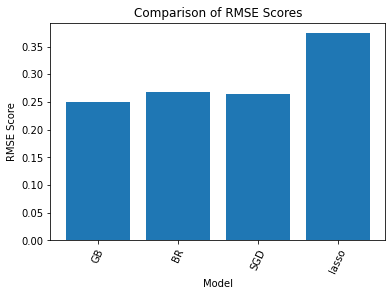

In [107]:
RMSE_scores = [GB_RMSE, BR_RMSE, SGD_RMSE, lasso_RMSE]
models = ["GB","BR","SGD",'lasso']

_ = plt.bar(models, RMSE_scores)
_ = plt.title("Comparison of RMSE Scores")
_ = plt.xlabel('Model')
_ = plt.ylabel('RMSE Score')
_ = plt.xticks(rotation = 65)

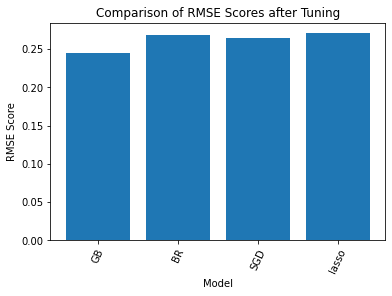

In [106]:
RMSE_tuned_scores = [GB_tuned_RMSE, BR_tuned_RMSE, SGD_tuned_RMSE, lasso_tuned_RMSE]
models = ["GB","BR","SGD",'lasso']

_ = plt.bar(models, RMSE_tuned_scores)
_ = plt.title("Comparison of RMSE Scores after Tuning")
_ = plt.xlabel('Model')
_ = plt.ylabel('RMSE Score')
_ = plt.xticks(rotation = 65)

In [124]:
rmse_df = pd.DataFrame(list(zip(models, RMSE_scores, RMSE_tuned_scores)),
               columns =['Model', 'RMSE Score','RMSE Score after Tuning'])

rmse_df['Difference in Scores'] = rmse_df['RMSE Score after Tuning'] - rmse_df['RMSE Score']

rmse_df['Difference in Scores'] = rmse_df['Difference in Scores'].round(decimals=4)

rmse_df

,Model,RMSE Score,RMSE Score after Tuning,Difference in Scores
0,GB,0.249776,0.244937,-0.0048
1,BR,0.268594,0.268594,0.0000
2,SGD,0.264436,0.264198,-0.0002
3,lasso,0.373767,0.270498,-0.1033
